# Treinamento e inferência YOLO_v2
Para a criação da yolo vamos utilizaar e modificar um repositório publico com a implementação da yolo_v2 em keras:
* https://github.com/rodrigo2019/keras_yolo2

### Conjunto de dados
Para treinarmos a YOLO é necessário que nosso conjunto de dados possua as coordenadas do bounding box do objeto. Para criarmos esse conjunto de dados iremos alterar os dados gerados no treinamento de Regressão e transformar as coordenadas x, y em xmin, ymin, xmax, ymax.
A biblioteca da Yolo nos permite carregar os dados de mais de uma maneira, com XML ou CSV, por praticidade iremos utilizar o CSV que funciona da seguinte maneira:

`fname, xmin, ymin, xmax, ymax, label`

caso haja anotações com o mesmo fname, ou seja, mais de uma anotação na imagem, as anotações serão agregadas para a mesma imagem.

In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
files = ["ann_train", "ann_val"]
for f in files:
    with open(f"{f}.txt") as ann, open(f"{f}_bbox.txt", "w") as new_ann:
        for line in ann:
            fname, x, y, label = line.strip().split(",")
            image = cv2.imread(fname)
            x = int(x)
            y = int(y)
            # Criação do bbox com tamanho 40x40 utilizando como centro as coordenadas x,y
            xmin = max(x - 20, 0)
            xmax = min(x + 20, image.shape[1] - 1)
            ymin = max(y - 20, 0)
            ymax = min(y + 20, image.shape[0] - 1)
            new_ann.write(f"{fname},{xmin},{ymin},{xmax},{ymax},{label}\n")


##### Visualização do novo conjunto de dados

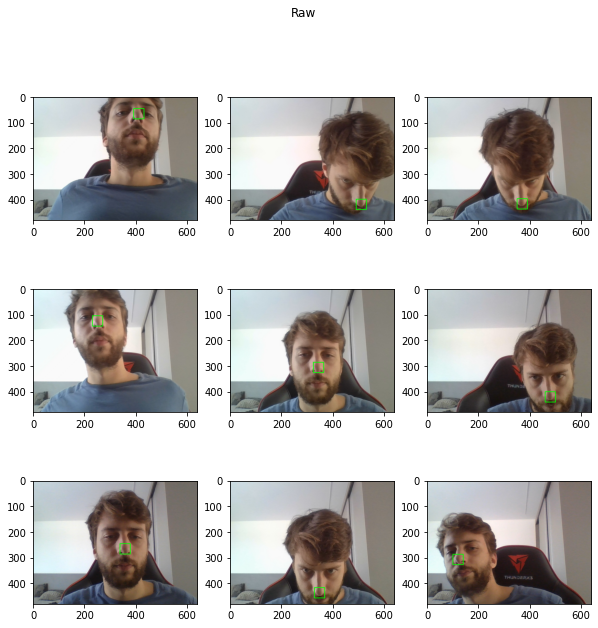

In [3]:
plt.figure(figsize=(10, 10))
with open("ann_val_bbox.txt") as ann:
    for i, line in enumerate(ann):
        if i == 9:
            break
        plt.subplot(3, 3, i + 1)
        fname, xmin, ymin, xmax, ymax, label = line.strip().split(",")
        xmin = int(xmin)
        xmax = int(xmax)
        ymin = int(ymin)
        ymax = int(ymax)
        image = cv2.imread(fname)

        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.suptitle('Raw')
    plt.show()


### Treinamento

In [21]:
%run .\keras_yolo2\train.py -c .\keras_yolo2\config.json

Insert a comment about this training: teste


 27%|█████████████████████▋                                                          | 43/159 [00:00<00:00, 209.75it/s]



Redirecting ../nose_detect.h5 file name to ./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549.h5.
Redirecting ./logs/1 tensorborad log to ./yolo_backup\yolo_nose_20210413095549\logs.
parsing ann_train_bbox.txt csv file can took a while, wait please.


 13%|██████████                                                                      | 20/159 [00:00<00:00, 194.70it/s]

parsing ann_train_bbox.txt csv file can took a while, wait please.


100%|███████████████████████████████████████████████████████████████████████████████| 159/159 [00:00<00:00, 200.53it/s]


Seen labels:	 {'nose': 158}
Given labels:	 ['nose']
Overlap labels:	 {'nose'}
using fresh backend model
Using a custom backend called yolo_backend.Backend.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 112, 112, 16)      448       
_________________________________________________________________
batch_normalization_56 (Batc (None, 112, 112, 16)      64        
_________________________________________________________________
re_lu_56 (ReLU)              (None, 112, 112, 16)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 56, 56, 16)        272       
_________________________________________________________________
batch_normalization_57 (Batc (



nose 0.0001
mAP: 0.0001
mAP improved from 0 to 5.415151561079843e-05, saving model to ./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549_bestMap.h5.
Epoch 2/40
40/40 [==============================] - 15s 366ms/step - loss: 97.4883 - val_loss: 231.5189

Epoch 00002: val_loss improved from 244.29887 to 231.51888, saving model to ./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549_bestLoss.h5


nose 0.0000
mAP: 0.0000
mAP did not improve from 5.415151561079843e-05.
Epoch 3/40
40/40 [==============================] - 15s 365ms/step - loss: 56.1888 - val_loss: 218.4424

Epoch 00003: val_loss improved from 231.51888 to 218.44238, saving model to ./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549_bestLoss.h5


nose 0.0000
mAP: 0.0000
mAP did not improve from 5.415151561079843e-05.
Epoch 4/40
40/40 [==============================] - 15s 366ms/step - loss: 34.7066 - val_loss: 203.8153

Epoch 00004: val_loss improved from 218.44238 to 203.81534, saving mo



nose 0.6137
mAP: 0.6137
mAP did not improve from 0.6188386608942129.
Epoch 23/40
40/40 [==============================] - 15s 379ms/step - loss: 0.9619 - val_loss: 0.8835

Epoch 00023: val_loss improved from 0.97403 to 0.88349, saving model to ./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549_bestLoss.h5


nose 0.6503
mAP: 0.6503
mAP improved from 0.6188386608942129 to 0.6503153681020009, saving model to ./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549_bestMap.h5.
Epoch 24/40
40/40 [==============================] - 15s 362ms/step - loss: 0.8898 - val_loss: 0.8076

Epoch 00024: val_loss improved from 0.88349 to 0.80759, saving model to ./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549_bestLoss.h5


nose 0.7310
mAP: 0.7310
mAP improved from 0.6503153681020009 to 0.7309726005447845, saving model to ./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549_bestMap.h5.
Epoch 25/40
40/40 [==============================] - 15s 368ms/step - l

### Inferência

In [12]:
from keras_yolov2.frontend import YOLO
import json

In [23]:
with open("keras_yolo2/config.json") as f:
    config = json.loads(f.read())

yolo = YOLO(backend=config['model']['backend'],
            input_size=(config['model']['input_size_h'], config['model']['input_size_w']),
            labels=config['model']['labels'],
            anchors=config['model']['anchors'],
            gray_mode=config['model']['gray_mode'])
yolo.load_weights(r"./yolo_backup\yolo_nose_20210413095549\yolo_nose_20210413095549_bestMap.h5")

using fresh backend model
Using a custom backend called yolo_backend.Backend.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 112, 112, 16)      448       
_________________________________________________________________
batch_normalization_84 (Batc (None, 112, 112, 16)      64        
_________________________________________________________________
re_lu_84 (ReLU)              (None, 112, 112, 16)      0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 56, 56, 16)        272       
_________________________________________________________________
batch_normalization_85 (Batc (None, 56, 56, 16)        64        
__________________________________________

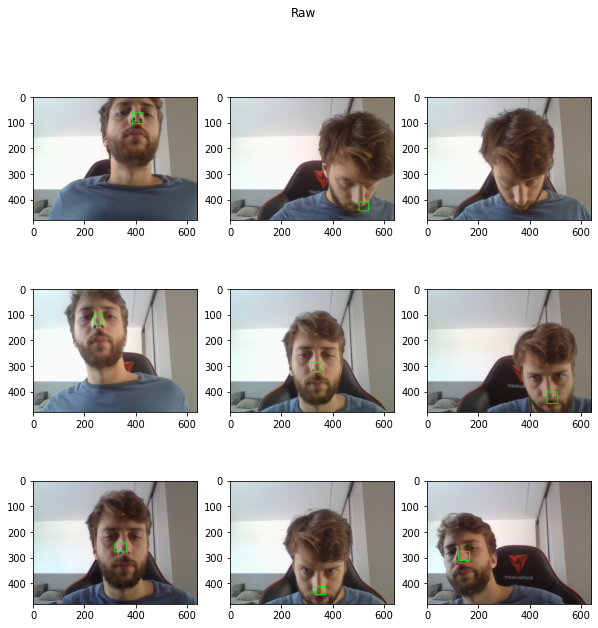

In [24]:
plt.figure(figsize=(10, 10))
with open("ann_val_bbox.txt") as ann:
    for i, line in enumerate(ann):
        if i == 9:
            break
        plt.subplot(3, 3, i + 1)
        fname, _, _, _, _, label = line.strip().split(",")
        image = cv2.imread(fname)
        bboxs = yolo.predict(image)
        for bbox in bboxs:
            xmin = int(bbox.xmin * image.shape[1])
            xmax = int(bbox.xmax * image.shape[1])
            ymin = int(bbox.ymin * image.shape[0])
            ymax = int(bbox.ymax * image.shape[0])
            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.suptitle('Raw')
    plt.show()